# PROYECTO: ANALISIS DEL PRECIO DE LA VIVIENDA

Autor: Adrián Robles Arques

En este proyecto final de la asignatura de Introducción a la Inteligencia Artificial y al Machine Learning, vamos a analizar un dataset sobre el precio y características de las viviendas en los Estados Unidos de América. Como ya señalé en un análisis previo, el contexto es importante, dado que las características socioeconómicas del entorno son importantes a la hora de considerar nuestras variables o de considerar añadir datos que pudieran enriquecer el dataset o establecer hipótesis de correlación.

In [2]:
#importamos bibliotecas
import pandas as pd
from google.colab import files
import io

#Cargamos los datos desde local
uploaded = {}
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

Saving data.csv to data.csv


## 2. EXPLORACIÓN DEL DATASET

In [3]:
#En este paso hacemos una primera revisión de los datos
#Vamos a hacer el código más compacto
functions = ['columns', 'dtypes', 'head()', 'tail()', 'sample(10)',
             'describe()', 'shape',
             'info()', 'isnull()', 'isnull().sum()']

for f in functions:
  print(f)
  print(eval('data.'+ f))
  print('----------------------------------')

columns
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')
----------------------------------
dtypes
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object
----------------------------------
head()
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:

In [4]:
data['price'].sort_values()

,price
4472,0.0
4542,0.0
4481,0.0
4408,0.0
4411,0.0
...,...
2761,4489000.0
2654,4668000.0
2286,7062500.0
4346,12899000.0


## 2.1. Análisis numérico de los datos
En un primer análsis, vemos que tenemos un total de 18 variables a considerar, de las cuales 10 son numéricas. Podemos darnos cuenta de que algunas variables categóricas han sido almacenadas de forma numérica, como "condition", "view" o "waterfront"; la última recibe solo un valor binario en función de si el inmueble está en linea de costa o no, mientras que las otras o dos reciben valor numérico para ordenar de mejor a peor la calidad de conservación y las vistas.

También es destacable que, mientras el número de habitaciones recibe un valor entero, extrañamente el de pisos del inmueble y baños cuenta con valores no enteros. Esto, como hemos dicho, se entiende en el contexto estadounidense, que dividen el concepto de "baño" en función del equipamiento del que disponga. Solo se considera un baño entero cuando tiene lavabo, lavamanos, ducha y bañera. Si un baño carece de alguno de estos útiles, se contabiliza como 0.5, 0.25 o 0.75, en función de lo que tenga. Así, un aseo con lavabo y lavamanos contaría como 0.5 baños.

Con el valor de alturas o "floors" ocurre lo mismo, solo se contabiliza como piso completo aquel que ocupa el 100% del area edificada, así los pisos superiores que emplean una porción menor, como por ejemplo los tejados abuhardillados, se contabilizan como 0.5 pisos.

Tomaremos como nuestra variable a estudio, o variable dependiente el precio de la vivienda, y estudiaremos a continuación por medio de diversas gráficas cómo se comporta en función del resto de variables para tratar de establecer una serie de hipótesis a partir de las cuales construir nuestro modelo, pero antes podemos ver algunos datos estadísticos: La media de precio es de 551963$, con una desviación estandar similar, algo bastante alto pero esperable viendo que el valor mínimo es 0 y el máximo está dos ordenes de magnitud por encima de la media. Esto podría indicar la presencia de gran cantidad de outliers, si vemos dos valores muy por encima de la media, que cambian bastante respecto a los valores previos, y también es preocupante la cantidad de valores nulos en el precio.

In [5]:
mask = data['price'] == 0 #Creamos la máscara para los precios nulos

data = data[~mask] #Seleccionamos las filas no nulas
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


De esta forma hemos eliminado los valores nulos en los precios, que no tenían sentido.

## 2.2. Análisis Gráfico de variables

In [7]:
#Empezamos importando la librerías gráficas y de análsis necesario
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

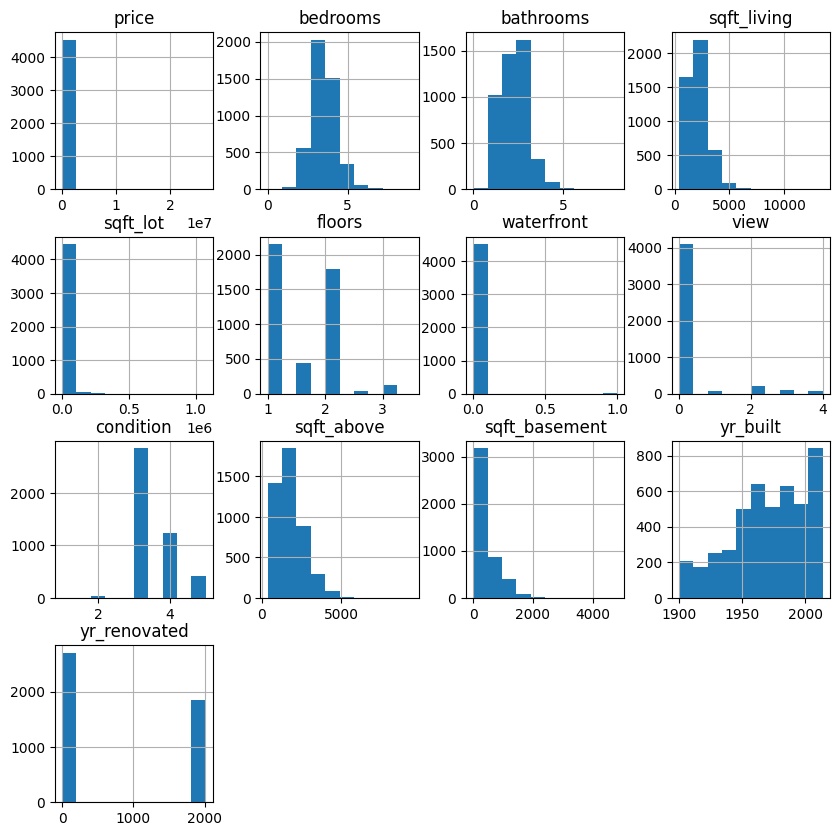

In [8]:
#Visualizamos histogramas de las variables numéricas
data.hist(figsize=(10,10))
plt.show()

Aquí podemos ver que en la gráfica de el año de renovación el hecho de dar valor 0 cuando la casa no ha sido renovada altera bastante el análsis, por tanto vamos a hacer que para aquellas casas no renovadas el año de renovación coincida con el de construcción.

In [9]:
data['yr_renovated'] = np.where(data['yr_renovated'] == 0, data['yr_built'], data['yr_renovated'])

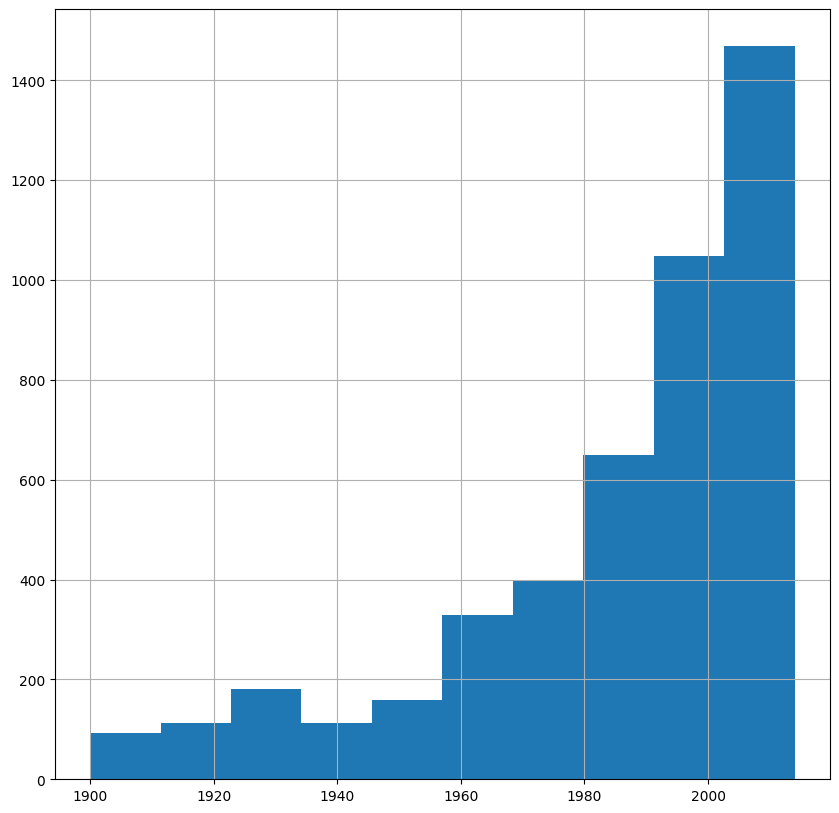

In [10]:
#Visualizamos el histograma en cuestión nuevamente
data['yr_renovated'].hist(figsize=(10,10))
plt.show()

Ahora vamos a empezar a comprar el precio de la vivienda con diferentes características de la misma.

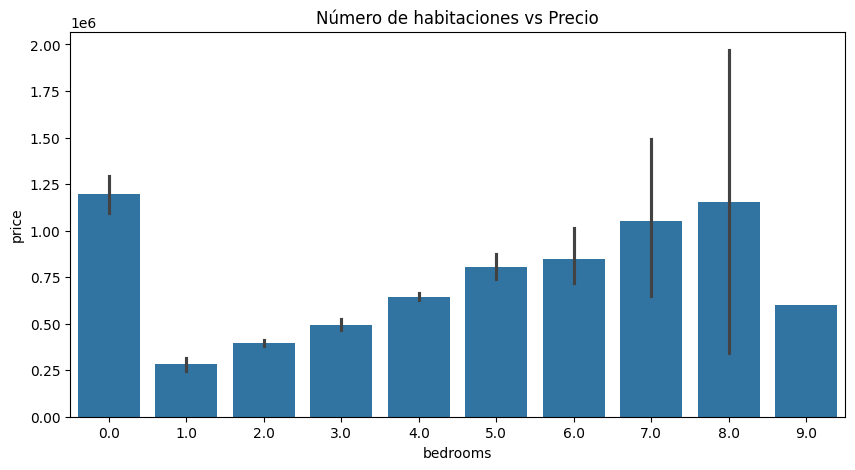

In [11]:
#Vamos a analizar las relaciones entre variables
plt.figure(figsize=(10,5))
sns.barplot(x = data["bedrooms"], y= data["price"])
plt.title('Número de habitaciones vs Precio')
plt.show()

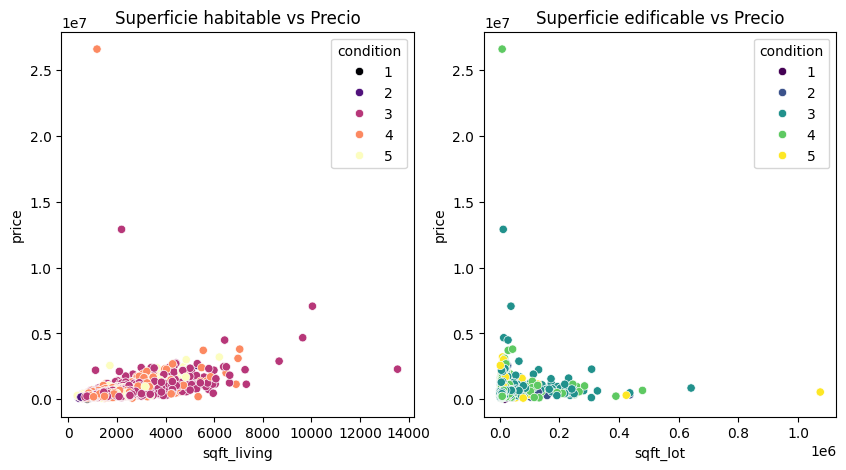

In [12]:
plot = plt.figure(figsize=(10,5))

ax1 = plot.add_subplot(121)
sns.scatterplot(data = data, x = "sqft_living", y = "price", hue = "condition",
                palette = 'magma')
ax1.set_title('Superficie habitable vs Precio')

ax2 = plot.add_subplot(122)
sns.scatterplot(data = data, x = "sqft_lot", y = "price", hue = "condition",
                palette = 'viridis')
ax2.set_title('Superficie edificable vs Precio')

plt.show()

Aquí vemos que los outliers en la parte superior del precio enmascaran bastante el análisis, vamos a probar a eliminarlos.

In [13]:
mask2 = data['price'] >= 0.6e7

data = data[~mask2]
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.548000e+03,4548.000000,4548.000000,4548.000000,4.548000e+03,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,5.480383e+05,3.394459,2.154464,2130.830255,1.483264e+04,1.512313,0.006376,0.234389,3.449428,1821.134785,309.695471,1970.801011,1985.081574
std,3.553765e+05,0.904542,0.775808,948.940535,3.597421e+04,0.538553,0.079606,0.765161,0.675267,850.245157,461.090009,29.763916,26.859541
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,1900.000000
25%,3.260750e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,1974.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,1994.000000
75%,6.572000e+05,4.000000,2.500000,2610.000000,1.096400e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,2005.000000
max,4.668000e+06,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


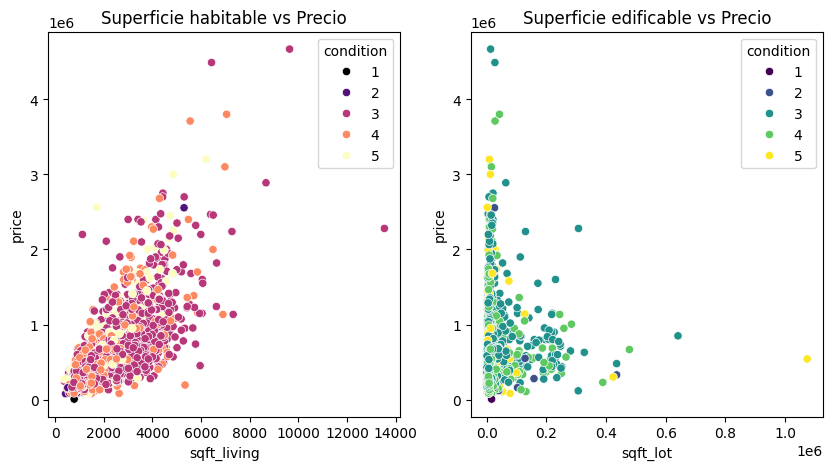

In [14]:
plot = plt.figure(figsize=(10,5))

ax1 = plot.add_subplot(121)
sns.scatterplot(data = data, x = "sqft_living", y = "price", hue = "condition",
                palette = 'magma')
ax1.set_title('Superficie habitable vs Precio')

ax2 = plot.add_subplot(122)
sns.scatterplot(data = data, x = "sqft_lot", y = "price", hue = "condition",
                palette = 'viridis')
ax2.set_title('Superficie edificable vs Precio')

plt.show()

Ahora ya empieza a apreciarse cierta tendencia, especialmente en la parte de superficie habitable. En cuanto a la superficie edificable, vemos muchos inmuebles ya tienen toda la superficie edificada, aunque hay otros tantos que si que se venden con bastante superficie a bajo precio, por lo que esta variable podría no ser tan relevante.

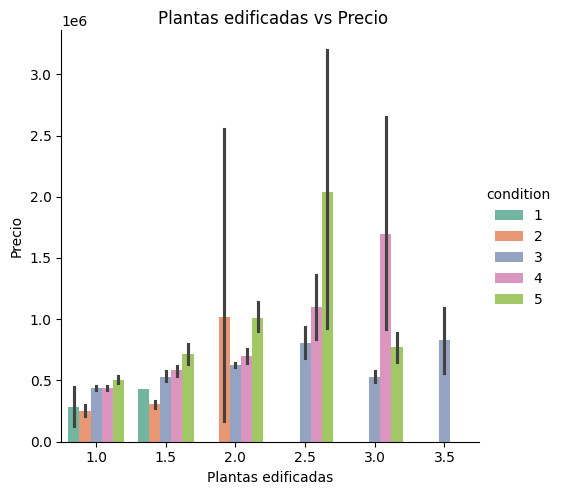

In [15]:
PVPL = sns.catplot(data = data, x = "floors", y = "price", hue = "condition",
            palette = 'Set2', kind = 'bar')
PVPL.set_axis_labels("Plantas edificadas", "Precio")
plt.suptitle('Plantas edificadas vs Precio')
plt.show()

Atendiendo a los últimos tres gráficos podemos ver que la condición del piso no parece ser especialmente relevante en su precio, y el número de plantas edificadas, si bien es cierto que parece suponer un aumento del precio al principio, es una tendencia que desparece a partir de las 2 plantas, y se observa una gran variabilidad.

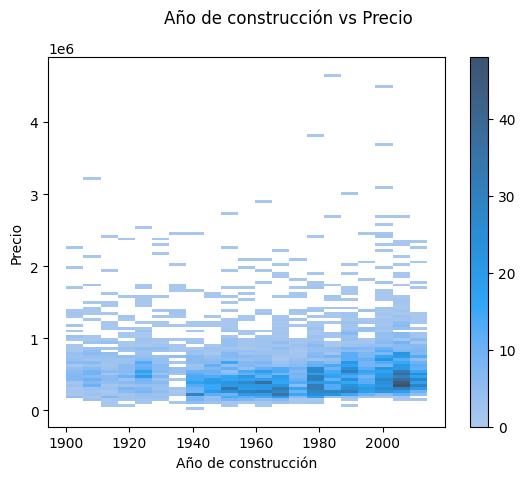

In [16]:
PVAC = sns.histplot(data = data, x = "yr_built", y = "price", cbar = True)
plt.xlabel("Año de construcción")
plt.ylabel("Precio")
plt.suptitle('Año de construcción vs Precio')
plt.show()

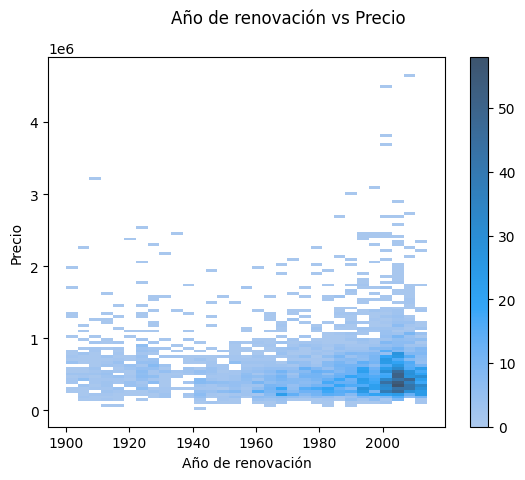

In [17]:
PVAR = sns.histplot(data = data, x = "yr_renovated", y = "price", cbar = True)
plt.xlabel("Año de renovación")
plt.ylabel("Precio")
plt.suptitle('Año de renovación vs Precio')
plt.show()

Atendiendo a estos dos últimos gráficos, no parece que el año de construcción o el año de renovación sean especialmente relevantes para el precio.

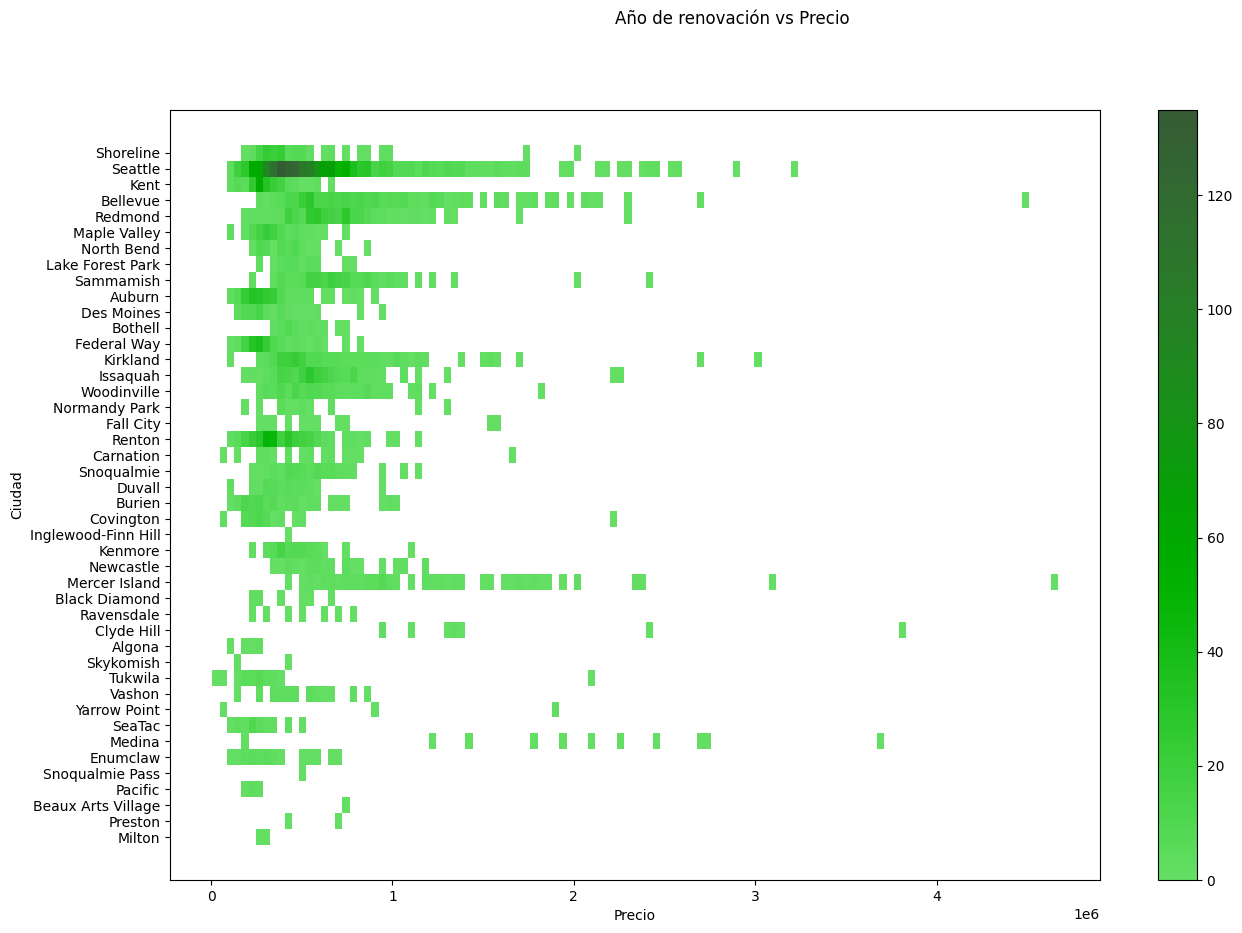

In [18]:
plot = plt.figure(figsize=(15,10))
PVAR = sns.histplot(data = data, x = "price", y = "city", cbar = True,
                    color= 'g')
plt.xlabel("Precio")
plt.ylabel("Ciudad")
plt.suptitle('Año de renovación vs Precio')
plt.show()

Aunque parece que la ciudad sí influye, porque diferentes ciudades tienen clarar diferencias en cuanto al valor máximo y mínimo, parece que muchas carecen de la cantidad necesaria de datos para llegar a alguna conclusión.

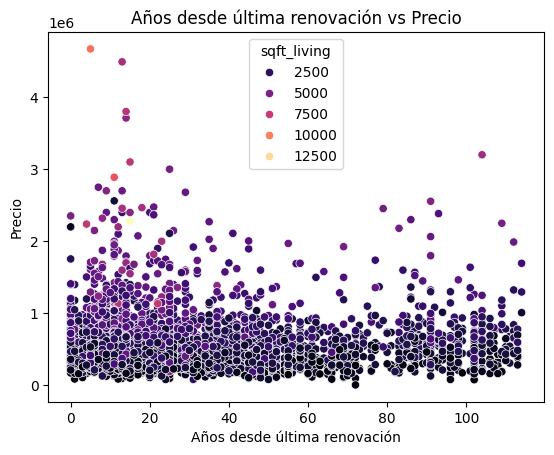

In [19]:
#Vamos a establecer años desde última renovación
data['Last renovation'] = 2014 - data['yr_renovated']

PVLR = sns.scatterplot(data = data, x = "Last renovation", y = "price", hue = 'sqft_living',
                        palette = 'magma' )
plt.xlabel("Años desde última renovación")
plt.ylabel("Precio")
plt.title('Años desde última renovación vs Precio')
plt.show()

Este nuevo dato introducido parece condensar mejor toda la información tanto del año de contrucción como del año de la última renovación, tomando el dato más relevante (Si la casa no había sido renovada, ya habíamos tomado la fecha de última renovación como la fecha de construcción) y teniendo en cuenta, por las fechas de la columna 'date', que el año en el que se toman los datos es 2014. Por lo tanto aquí hemos condensado la información de otras 3 columnas, una reducción de dimensionalidad notable.

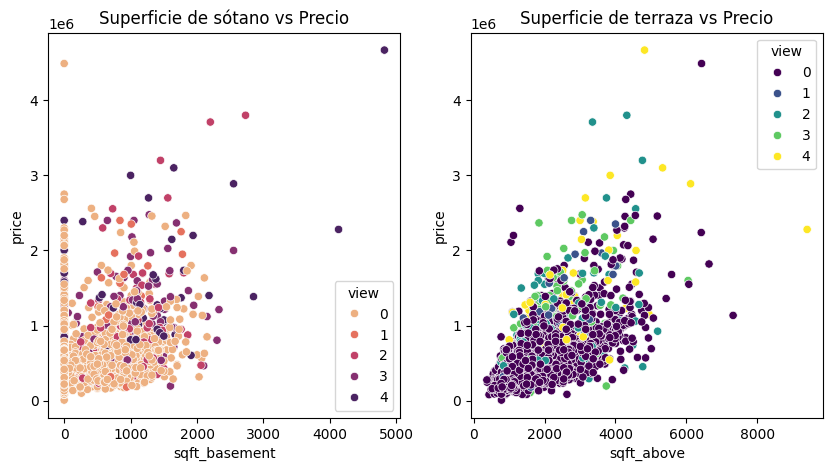

In [20]:
plot = plt.figure(figsize=(10,5))

ax1 = plot.add_subplot(121)
sns.scatterplot(data = data, x = "sqft_basement", y = "price", hue = "view",
                palette = 'flare')
ax1.set_title('Superficie de sótano vs Precio')

ax2 = plot.add_subplot(122)
sns.scatterplot(data = data, x = "sqft_above", y = "price", hue = "view",
                palette = 'viridis')
ax2.set_title('Superficie de terraza vs Precio')

plt.show()

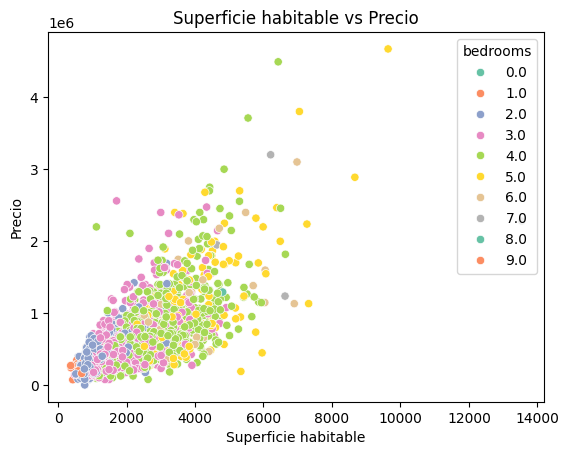

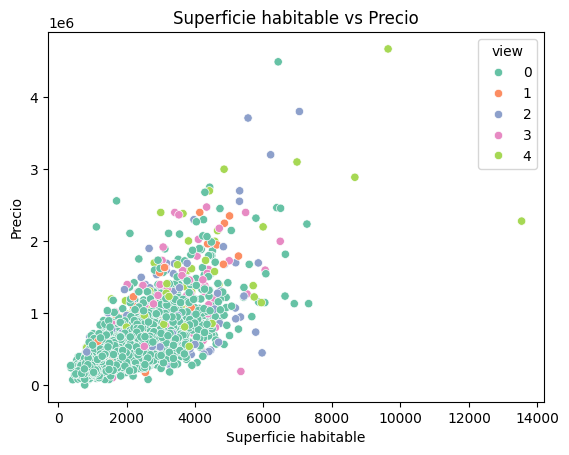

In [21]:
SHBPV = sns.scatterplot(data = data, x = "sqft_living", y = "price", hue = "bedrooms",
                palette = 'Set2')
plt.xlabel("Superficie habitable")
plt.ylabel("Precio")
plt.title('Superficie habitable vs Precio')
plt.show()

SHVPV = sns.scatterplot(data = data, x = "sqft_living", y = "price", hue = "view",
                palette = 'Set2')
plt.xlabel("Superficie habitable")
plt.ylabel("Precio")
plt.title('Superficie habitable vs Precio')
plt.show()

Con este gráfico más trabajado empieza a verse cierto patron, presentando como variable principal la superficie habitable, junto con el número de habitaciones, que crece con el espacio habitable, y también con el nivel de las vistas y el tiempo desde la última renovación. La ubicación frente al mar también parece relevante para incrementar el precio si se cruza con los otros datos.

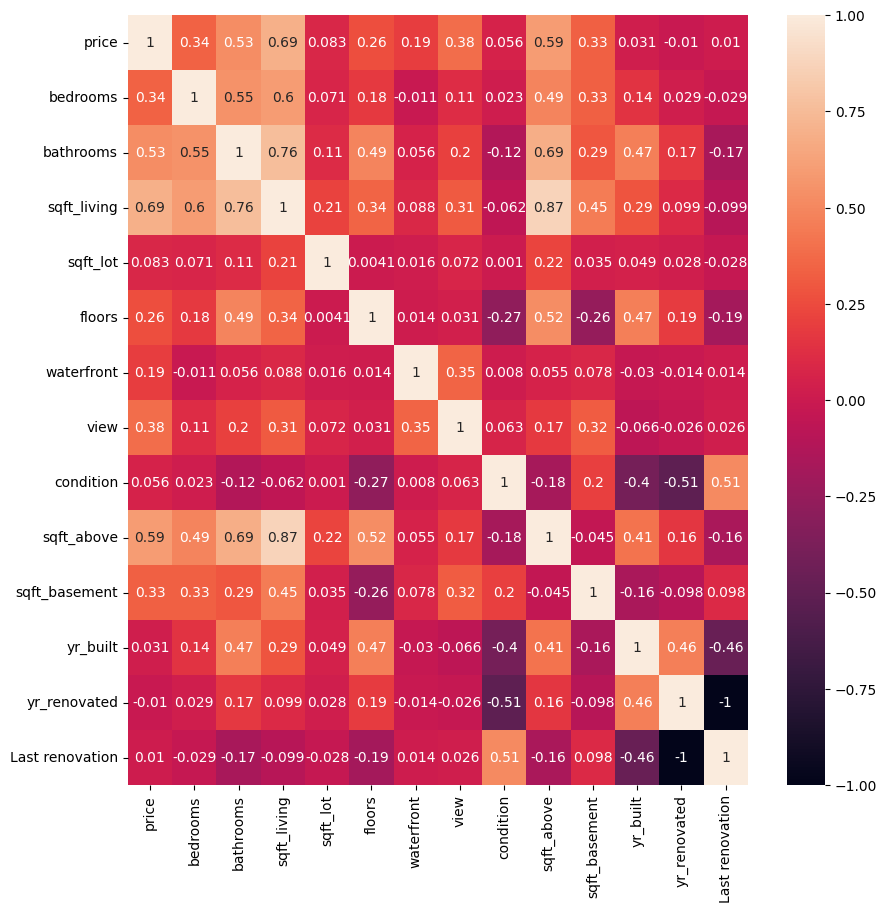

In [22]:
#Analizamos la correlación de variables solo numéricas
plot = plt.figure(figsize=(10,10))
correl = data.corr(numeric_only= True)
sns.heatmap(correl, annot= True)
plt.show()

## 2.3. Análisis de correlaciones

El análisis de correlaciones corrobora lo que las gráficas ya nos indicaban. La correlación de mayor grado con el precio se da con la superficie habitable, que a su vez se correlaciona altamente con las habitaciones y sobre todo con el número de baños, por lo que es entendible que estas dos variables también presenten una alta correlación con el precio final de venta. La superficie de sótano y 'above', que podemos interpretar como superficie habitable restando el sótano, también se correlacionan altamente con la superficie habitable total, teniendo especialmente en cuenta que muchas propiedades tan siquiera tienen sótano.

Vamos a establecer una nueva variable llamada simplemente 'basement' que codificará si una propiedad tiene o no sótano, y así podremos cruzarla con la superficie total, sin tener en cuenta cuanta de esa superficie es del sótano y cuanta no, y de esa forma su implicación no se opacará por la superficie total. Veamos la nueva correlación.

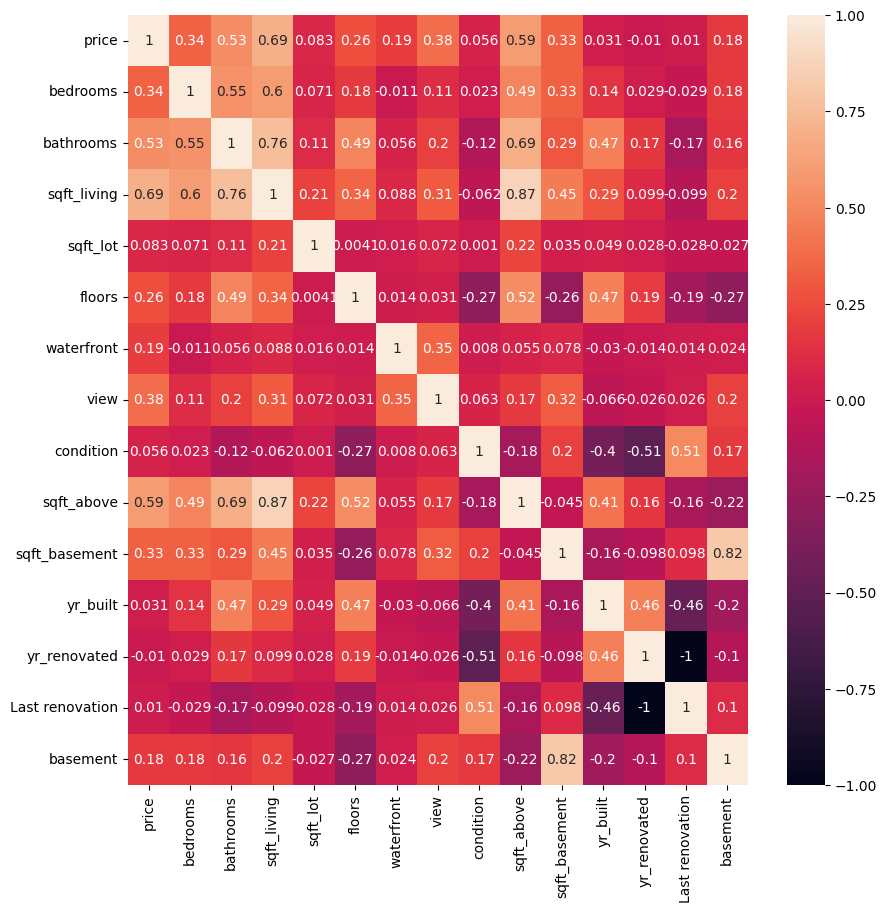

In [23]:
mask_basement = data['sqft_basement'] > 0
data['basement'] = np.where(mask_basement, 1, 0)

#Analizamos la correlación de variables nuevamente
plot = plt.figure(figsize=(10,10))
correl = data.corr(numeric_only= True)
sns.heatmap(correl, annot= True)
plt.show()

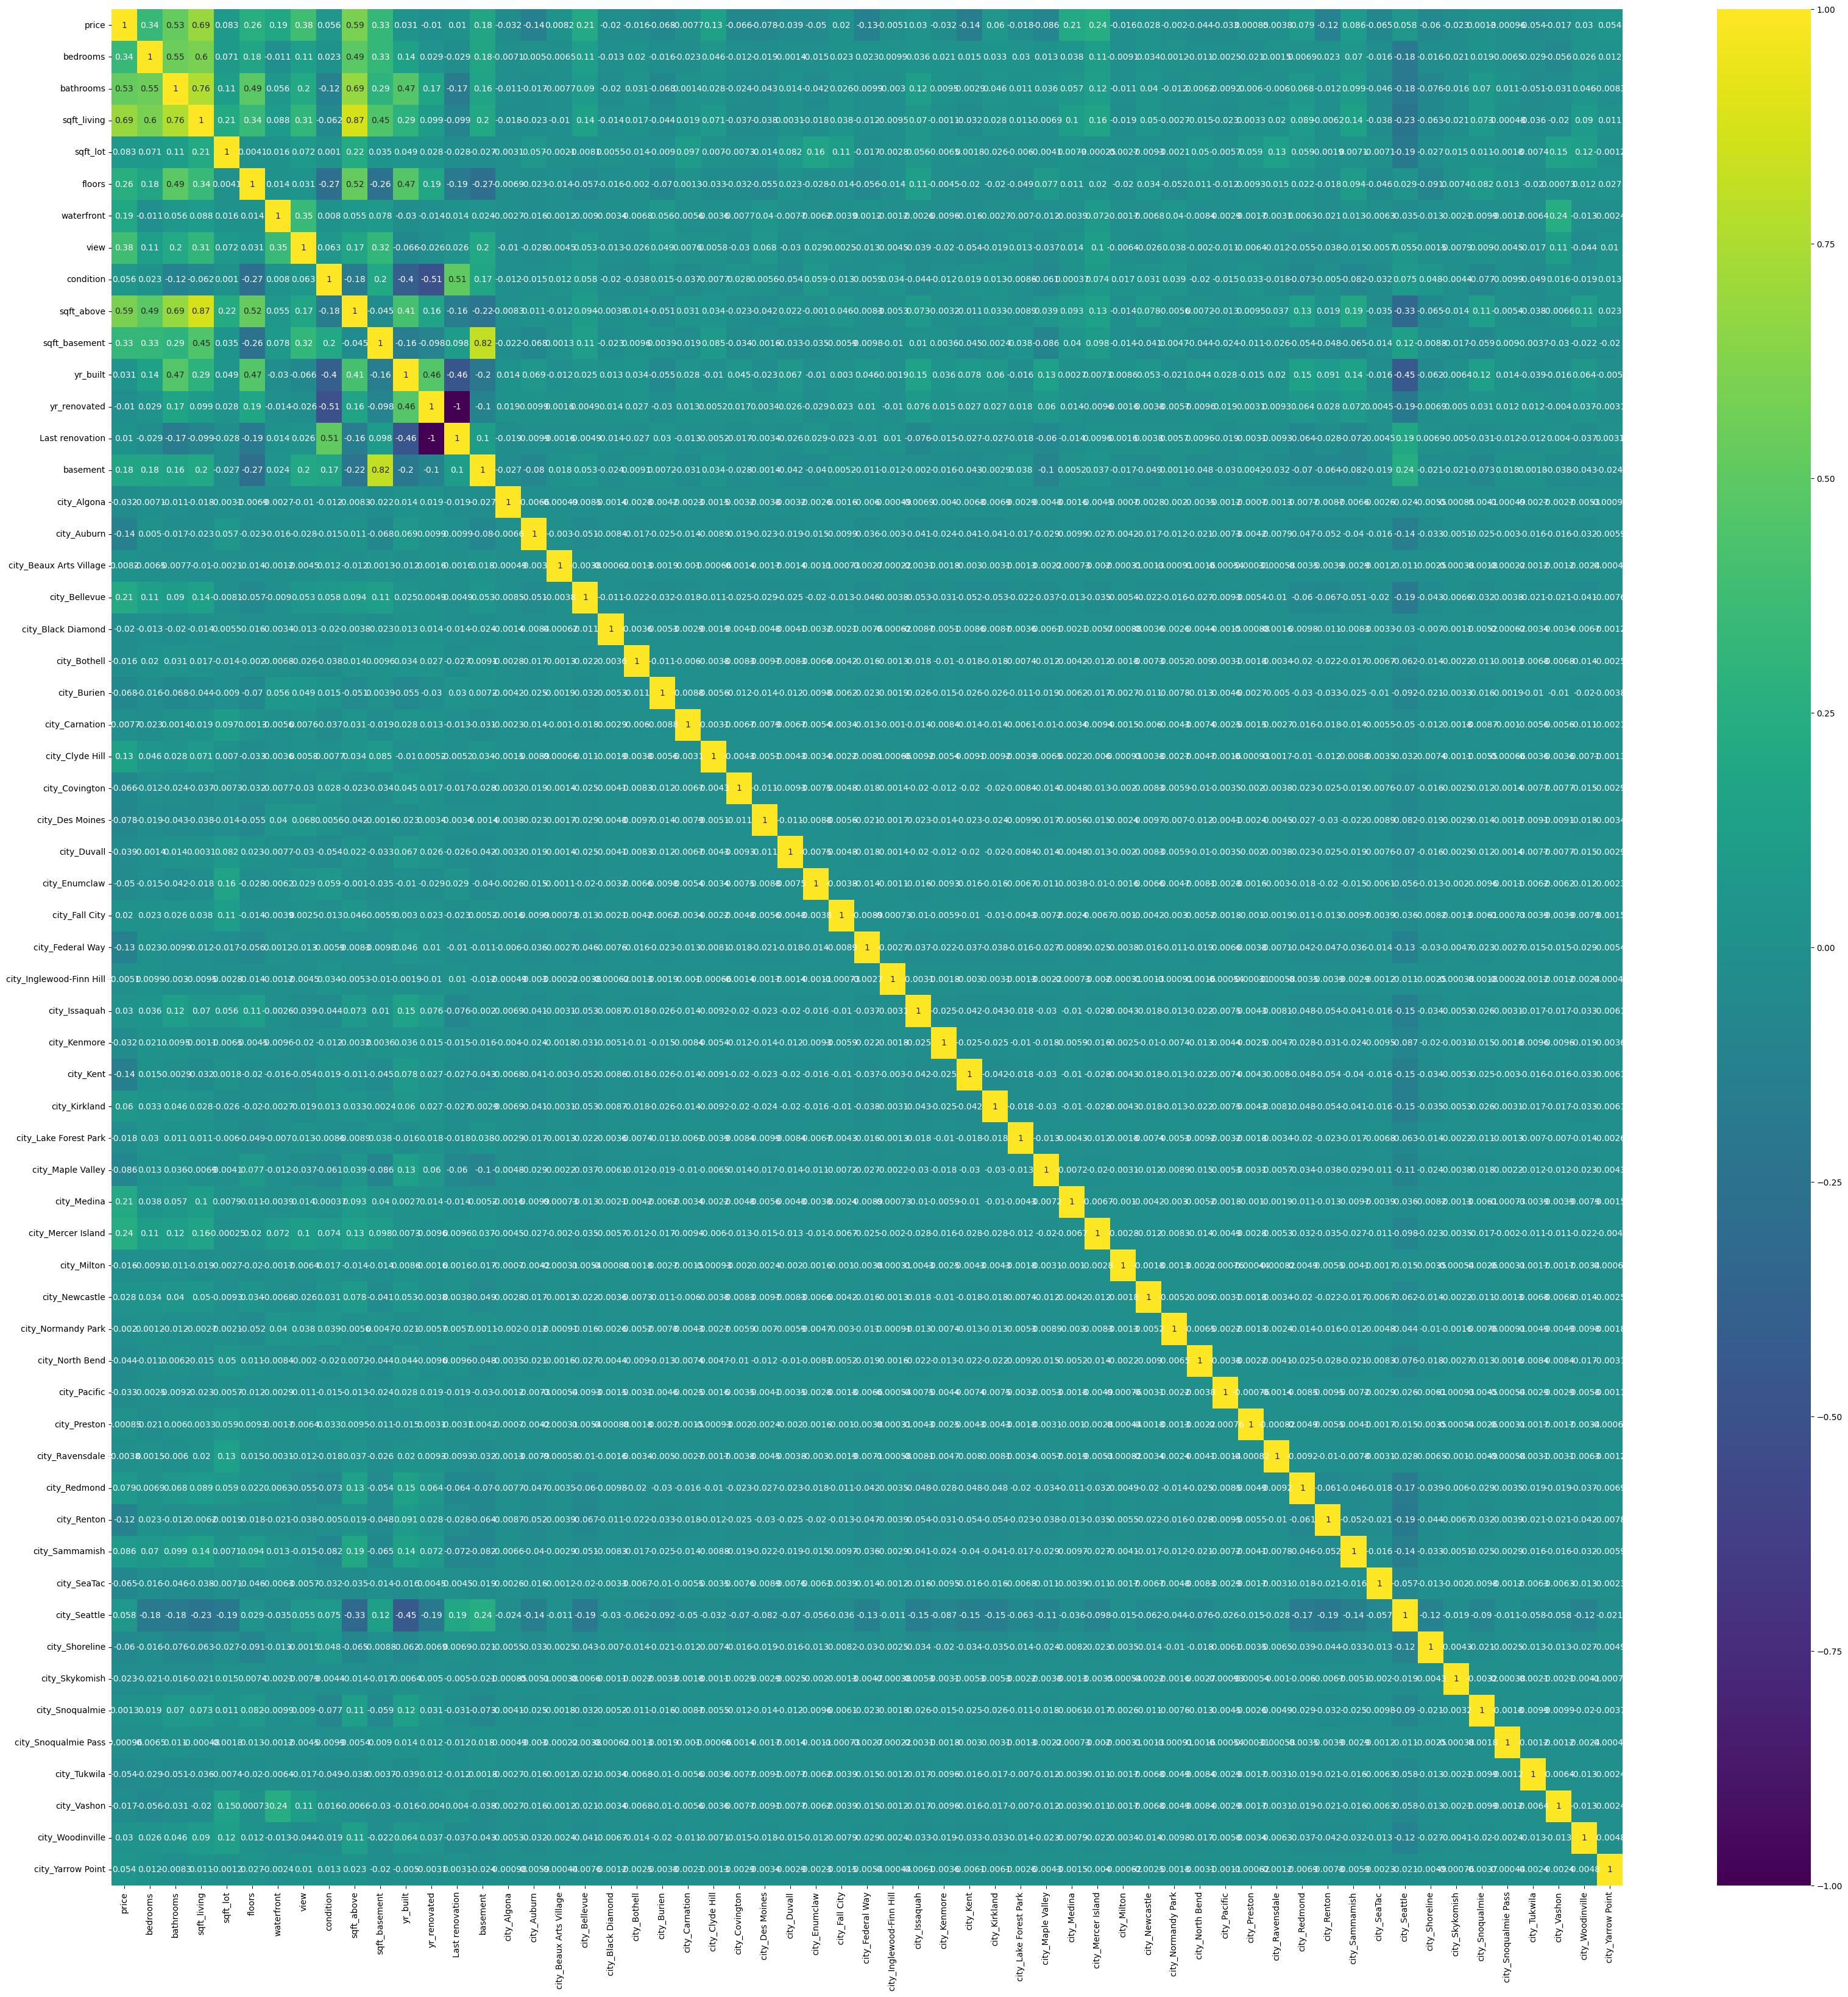

In [24]:
#También vamos a separar las variables categóricas y aplicar OHE
cat_colums = ['city']
OHE_data = pd.get_dummies(data, columns = cat_colums,
                          prefix= ['city'],
                          prefix_sep= '_', dtype= int)
plt.figure(figsize=(40,40))
correl_new = OHE_data.corr(numeric_only= True)
sns.heatmap(correl_new, annot= True, cmap = 'viridis')
plt.show()

Viendo esto podemos concluir que la presencia de sótano sí se correlaciona positivamente con el precio, por lo que podemos tener esta variable nueva en cuenta.

Otras variables con una correlación relevante parecen ser las vistas y la ubicación en línea de costa, como ya veníamos observando en las gráficas anteriores. Finalmente a juzgar por la gráfica de correlaciones ni año de renovación ni el año de construcción son especialmente relevantes.

Otra variable que puede destacarse es el número de pisos, aunque esto también está relacionado con la superficio habitable total. La superficie total edificable, por el contrario, no parece influir en el precio final.

Finalmente, si hacemos el análisis de correlación de precio por ciudad, vemos tan solo unas pocas correlaciones minimamente destacables, que podrían achacarse a otros factores, y también se aprecia como en las grandes ciudades, como Seattle, las propiedades tienden a ser más pequeñas. Sin embargo, con tanta cantidad de ciudades y una muestra tan pequeña para cada una, no sería apropiado hacer un estudio por cada ciudad.

## 3: Fase de entrenamiento y validación

Finalizado tanto el análisis numérico como el gráfico, vamos a delimitar nuestras variables dependientes e independientes y establecer las hipótesis necesarias para la regresión, preparar los diferentes modelos y evaluarlos en base a las métricas aprendidas en clase.

En primer lugar, vamos a importar las librerias y funciones básicas para construir y entrenar los modelos, así como para su posterior validación.

In [25]:
#Importamos las bibliotecas y funciones necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 3.1. HIPOTESIS 1: Variables mínimas

Juzgando por el análisis numérico y gráfico visto anteriormente, vamos a tomar como variables de mínima dimensionalidad a la superficie habitable, las vistas, la ubicación costera y la presencia de sótano, y veremos la aproximación que obtenemos basándonos solo en este conjunto.

In [26]:
#Creamos el subconjunto de variables mínimas
core = data[['price','sqft_living', 'basement', 'view', 'waterfront']]

core.head()

,price,sqft_living,basement,view,waterfront
0,313000.0,1340,0,0,0
1,2384000.0,3650,1,4,0
2,342000.0,1930,0,0,0
3,420000.0,2000,1,0,0
4,550000.0,1940,1,0,0


### 3.1.1: Definición de variables y entrenamiento

In [27]:
#Definimos las variables dependientes e independientes
X_core = core.drop('price', axis = 1)
Y_core = core['price']

#Establecemos los subconjuntos de entrenamiento y validación
X_core_train, X_core_test, Y_core_train, Y_core_test = train_test_split(
    X_core, Y_core, test_size= 0.2, random_state= 24)

In [28]:
#Estblecemos la regresión y entrenamos el modelo
Reg_core = LinearRegression()
Reg_core.fit(X_core_train, Y_core_train)

LinearRegression()

### 3.1.2. Validación del modelo

In [29]:
#Validación del modelo

#Predicción de Y para el modelo entrenado a partir de los datos test
Y_core_predict = Reg_core.predict(X_core_test)

#Calculamos los resultados de las métricas estadísticas
mse_core = mean_squared_error(Y_core_test, Y_core_predict)
mae_core = mean_absolute_error(Y_core_test, Y_core_predict)
r2_core = r2_score(Y_core_test, Y_core_predict)

price_mean = Y_core.mean()
err_rel = mae_core/price_mean

print('MSE = {}'.format(mse_core))
print('MAE = {}'.format(mae_core))
print('Error relativo = {}%'.format(round(err_rel*100,2)))
print('R2 = {}'.format(r2_core))

MSE = 50781564428.88309
MAE = 157342.9313167145
Error relativo = 28.71%
R2 = 0.4780484991796238


### 3.1.3 Evaluación

Vemos que este modelo tiene una baja aproximación lineal con un R2 muy bajo, pero con un error relativo ligeramente superior al 25%, lo que indica que el modelo no aproxima del todo bien linealmente, probablemente podamos añadir dator, pero el error no es demasiado grande. El siguiente paso sería añadir alguna otra variable a considerar, especialmente aquellas que no tuvieran una correlación elevada con las ya presentes, puesto que es importante que las variables también sean independientes entre sí.

## 3.2. HIPOTESIS 2: Nucleo enriquecido

Partiendo del conjunto de mínima dimensionalidad tomado previamente, vamos a añadir dos variables que podrían considerarse importantes porque aglutinan bastante información y no se correlacionan tanto con la superficie habitable, dado que si añadiesemos las variables que presentan mayor correlación con la superficie habitable que con el precio, prácticamente no estaríamos añadiendo información nueva.

En este caso vamos a considerar las variables anteriores, más la condición del piso, el número de plantas y el año de última renovación, que engloba la información del año de construcción y de la fecha de renovación más reciente.

In [30]:
#Creamos el nuevo subconjunto
rich = data[['price','sqft_living','view', 'waterfront', 'basement', 'floors', 'condition', 'Last renovation']]

rich.head()

,price,sqft_living,view,waterfront,basement,floors,condition,Last renovation
0,313000.0,1340,0,0,0,1.5,3,9
1,2384000.0,3650,4,0,1,2.0,5,93
2,342000.0,1930,0,0,0,1.0,4,48
3,420000.0,2000,0,0,1,1.0,4,51
4,550000.0,1940,0,0,1,1.0,4,22


### 3.2.1 Definición de variables y entrenamiento del modelo


In [31]:
#Definimos las variables dependientes e independientes
X_rich = rich.drop('price', axis = 1)
Y_rich = rich['price']

#Establecemos los subconjuntos de entrenamiento y validación
X_rich_train, X_rich_test, Y_rich_train, Y_rich_test = train_test_split(
    X_rich, Y_rich, test_size= 0.2, random_state= 24)

In [32]:
#Estblecemos la regresión y entrenamos el modelo
Reg_rich = LinearRegression()
Reg_rich.fit(X_rich_train, Y_rich_train)

LinearRegression()

### 3.2.2 Validación del modelo

In [33]:
#Validación del modelo

#Predicción de Y para el modelo entrenado a partir de los datos test
Y_rich_predict = Reg_rich.predict(X_rich_test)

#Calculamos los resultados de las métricas estadísticas
mse_rich = mean_squared_error(Y_rich_test, Y_rich_predict)
mae_rich = mean_absolute_error(Y_rich_test, Y_rich_predict)
r2_rich = r2_score(Y_rich_test, Y_rich_predict)

price_r_mean = Y_rich.mean()
err_rel_rich = mae_rich/price_r_mean

print('MSE = {}'.format(mse_rich))
print('MAE = {}'.format(mae_rich))
print('Error relativo = {}%'.format(round(err_rel_rich*100,2)))
print('R2 = {}'.format(r2_rich))

MSE = 48814070366.90407
MAE = 152915.81433174532
Error relativo = 27.9%
R2 = 0.49827112307974597


# 3.2.3 Evaluación

Vistos los resultados, añadir estas columnas ha resultado ser irrelevante, a penas han alterado los resultados del modelo anterior, probablemente los datos estuvieran muy poco correlados con el precio o demasiado correlados a su vez con la superficie habitable, que parece ser el principal factor que afecta a nuestra variable dependiente.

## 3.3. HIPOTESIS 3: La importancia de la ubicación

Aunque hasta ahora no estabamos teniendo en consideración el dato de la ciudad donde se ubicaba el inmueble dada a la gran cantidad de ciudades presentes para la no tan abundante cantidad de datos, este podría ser la pieza que nos faltase en el rompecabezas, dado que es un factor que claramente sabemos que va a influir en el precio y no necesariamente se relaciona con la superficie construida.

De modo que vamos a aprovechar la codificación One Hot previa para añadir los datos de las ciudades donde se ubica cada inmueble, y atendiendo a esto veamos a si podemos mejorar el modelo.

In [49]:
#Vamos a extraer los nombres de las ciudades
cities = []
for column in OHE_data.columns:
  if 'city' in column:
    cities.append(column)

In [50]:
#Creamos la lista de variables con nuestra lista nucleo y las ciudades
core_list = ['price','sqft_living','view', 'waterfront','basement']

grand_list = core_list + cities

grand = OHE_data[grand_list]

grand.head()

,price,sqft_living,view,waterfront,basement,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,1340,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,3650,4,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,1930,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,2000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,1940,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.3.1 Definición de variables y entrenamiento del modelo

In [51]:
#Definimos las variables dependientes e independientes
X_grand = grand.drop('price', axis = 1)
Y_grand = grand['price']

#Establecemos los subconjuntos de entrenamiento y validación
X_grand_train, X_grand_test, Y_grand_train, Y_grand_test = train_test_split(
    X_grand, Y_grand, test_size= 0.2, random_state= 24)

In [52]:
#Estblecemos la regresión y entrenamos el modelo
Reg_grand = LinearRegression()
Reg_grand.fit(X_grand_train, Y_grand_train)

LinearRegression()

### 3.3.2. Validación del modelo

In [53]:
#Evaluamos el modelo grand

#Predicción del modelo
Y_grand_predict = Reg_grand.predict(X_grand_test)

#Calculamos los resultados de las métricas estadísticas
mse_grand = mean_squared_error(Y_grand_test, Y_grand_predict)
mae_grand = mean_absolute_error(Y_grand_test, Y_grand_predict)
r2_grand = r2_score(Y_grand_test, Y_grand_predict)

price_g_mean = Y_grand.mean()
err_rel_grand = mae_grand/price_g_mean

print('MSE = {}'.format(mse_grand))
print('MAE = {}'.format(mae_grand))
print('Error relativo = {}%'.format(round(err_rel_grand*100,2)))
print('R2 = {}'.format(r2_grand))

MSE = 33486082720.803947
MAE = 119869.42233224613
Error relativo = 21.87%
R2 = 0.6558177888119996


### 3.3.3. Evaluación

En base a estos resultamos podemos concluir que estabamos desencaminados en la suposición inicial de que los datos de los datos de la ciudad donde se ubicaba el inmueble no iba a ser especialmente relevante por falta de datos. Vemos que al añadir estas columnas, el R2 ha subido por encima del 0.65 y el error relativo ha descendido hasta el 21%, lo que supone una mejora notable respecto al modelo anterior.

Con una búsqueda que enriqueciera los datos, aportando más información dentro del contexto apropiado, es decir, bienes inmobiliarios en los estados unidos, tal vez podríamos mejorar aún más el modelo.

## HIPOTESIS 4: Reescalado de datos

Partiendo de los mismos datos, vamos a comprobar si un reescalado de los datos de la variable dependiente ayuda a reducir el error del modelo, dado que el valor máximo es muy elevado, llegando a seis ordenes de magnitud. Como los valores negativos serían carentes de sentido, emplearemos el MinMaxScaler para establecer el rango deseado.

In [54]:
#Importaremos la función que necesitamos
from sklearn.preprocessing import MinMaxScaler

In [55]:
#Creamos la herramienta de reescalado para un rango 1-10
scaler = MinMaxScaler(feature_range= (1,10))

price_scaled = scaler.fit_transform(data[['price']])
data_scaled = grand.copy()
data_scaled['price'] = price_scaled

data_scaled.head()

,price,sqft_living,view,waterfront,basement,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,1.589417,1340,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.589031,3650,4,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.645423,1930,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.796060,2000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.047122,1940,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.4.1 Definición de variables y entrenamiento del modelo

In [56]:
#Definimos las variables dependientes e independientes
X_scaled = data_scaled.drop('price', axis = 1)
Y_scaled = data_scaled['price']

#Establecemos los subconjuntos de entrenamiento y validación
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(
    X_scaled, Y_scaled, test_size= 0.2, random_state= 24)

In [57]:
#Estblecemos la regresión y entrenamos el modelo
Reg_scaled = LinearRegression()
Reg_scaled.fit(X_scaled_train, Y_scaled_train)

LinearRegression()

### 3.4.2 Validación del modelo

In [58]:
#Evaluamos el modelo reescalado

#Resultados predichos por el modelo
Y_scaled_predict = Reg_scaled.predict(X_scaled_test)

#Calculamos los resultados de las métricas estadísticas
mse_scaled = mean_squared_error(Y_scaled_test, Y_scaled_predict)
mae_scaled = mean_absolute_error(Y_scaled_test, Y_scaled_predict)
r2_scaled = r2_score(Y_scaled_test, Y_scaled_predict)

price_s_mean = Y_scaled.mean()
err_rel_scaled = mae_scaled/price_s_mean

print('MSE = {}'.format(mse_scaled))
print('MAE = {}'.format(mae_scaled))
print('Error relativo = {}%'.format(round(err_rel_scaled*100,2)))
print('R2 = {}'.format(r2_scaled))

MSE = 0.12489361996360972
MAE = 0.23149753250723473
Error relativo = 11.33%
R2 = 0.6558177888119994


### 3.4.3. Evaluación

Finalmente observamos que el reescalado ha sido muy util. En este caso, aunque el ajuste lineal se mantiene idéntico al caso anterior, al ajustar los errores a valores más manejables, vemos que el error relativo a la media producido por el modelo se ha reducido a la mitad respecto al caso anterior, pasando del 21% al 11%, lo que es una mejora notable en el desempeño del modelo.